In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Dataset [Link](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation)

In [2]:
!gdown 1nFq554V8GQ9N1h5ALaHXVMhH1eIZVOeD

Downloading...
From: https://drive.google.com/uc?id=1nFq554V8GQ9N1h5ALaHXVMhH1eIZVOeD
To: /content/dataset.zip
100% 101k/101k [00:00<00:00, 124MB/s]


In [3]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: test.csv                
  inflating: train.csv               


In [4]:
df = pd.read_csv('train.csv',index_col = 'ID')

In [5]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 462809 to 461879
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 693.3+ KB


In [7]:
for col in df.columns:
    print(f"For {col} percentage of missing values is {df[col].isna().sum()*100/len(df[col])}%")

For Gender percentage of missing values is 0.0%
For Ever_Married percentage of missing values is 1.7352503718393655%
For Age percentage of missing values is 0.0%
For Graduated percentage of missing values is 0.9667823500247893%
For Profession percentage of missing values is 1.5369360436291521%
For Work_Experience percentage of missing values is 10.275161130391671%
For Spending_Score percentage of missing values is 0.0%
For Family_Size percentage of missing values is 4.152206246901339%
For Var_1 percentage of missing values is 0.9419930589985126%
For Segmentation percentage of missing values is 0.0%


Gender


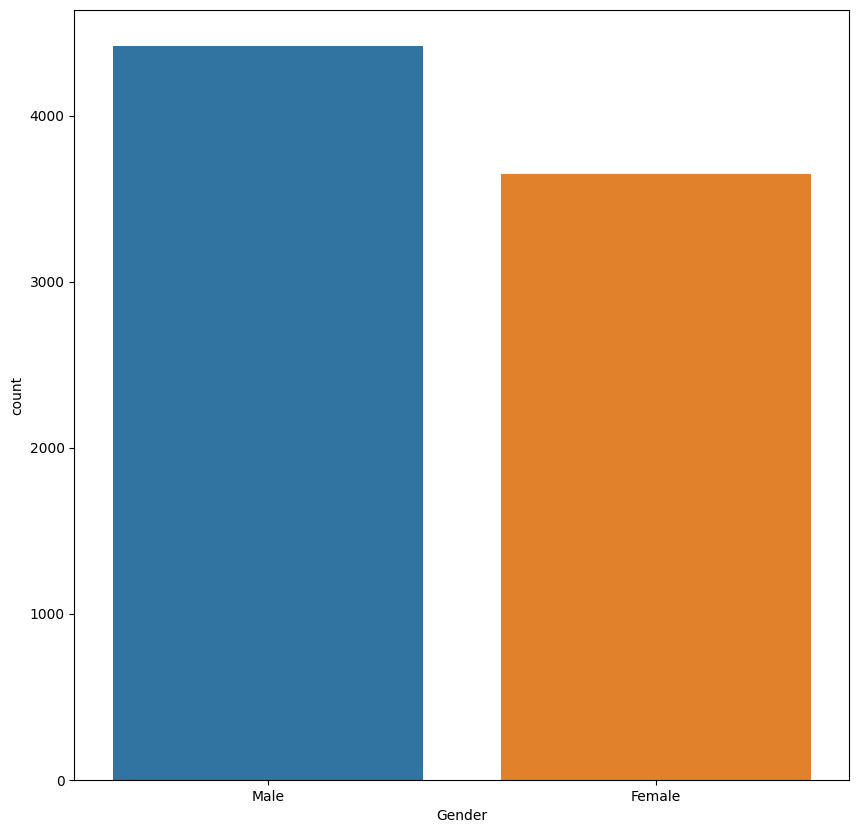

Ever_Married


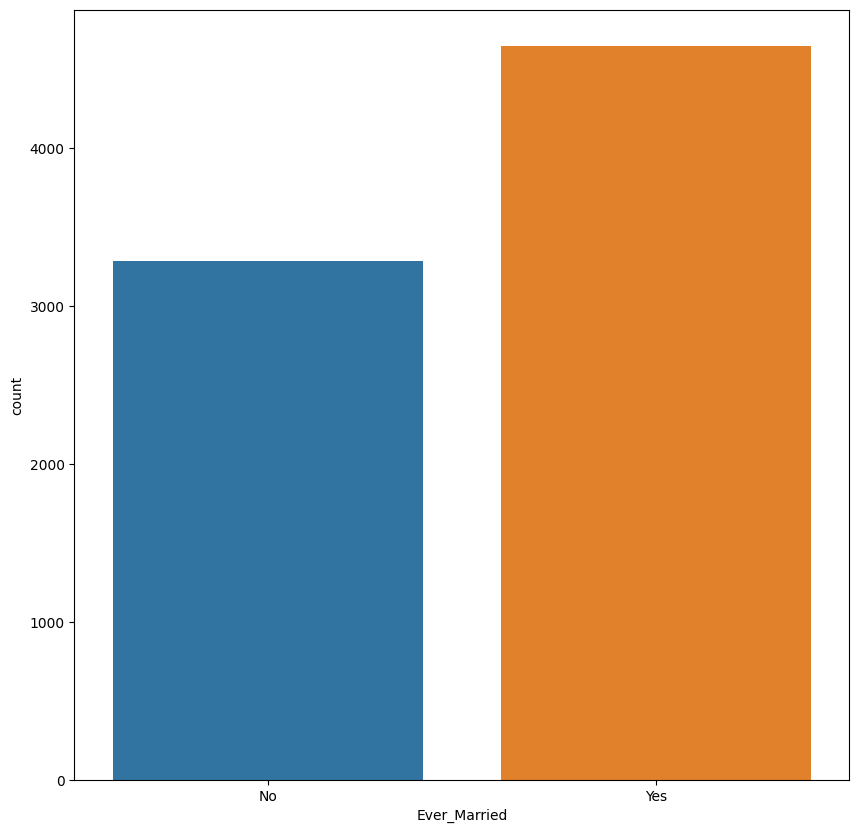

Graduated


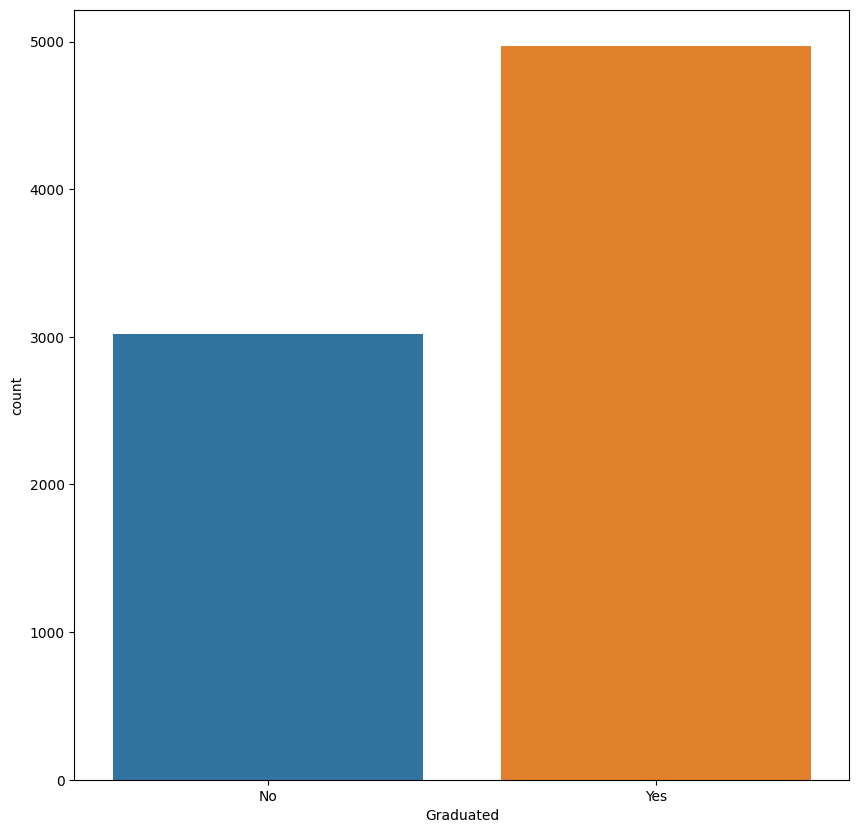

Profession


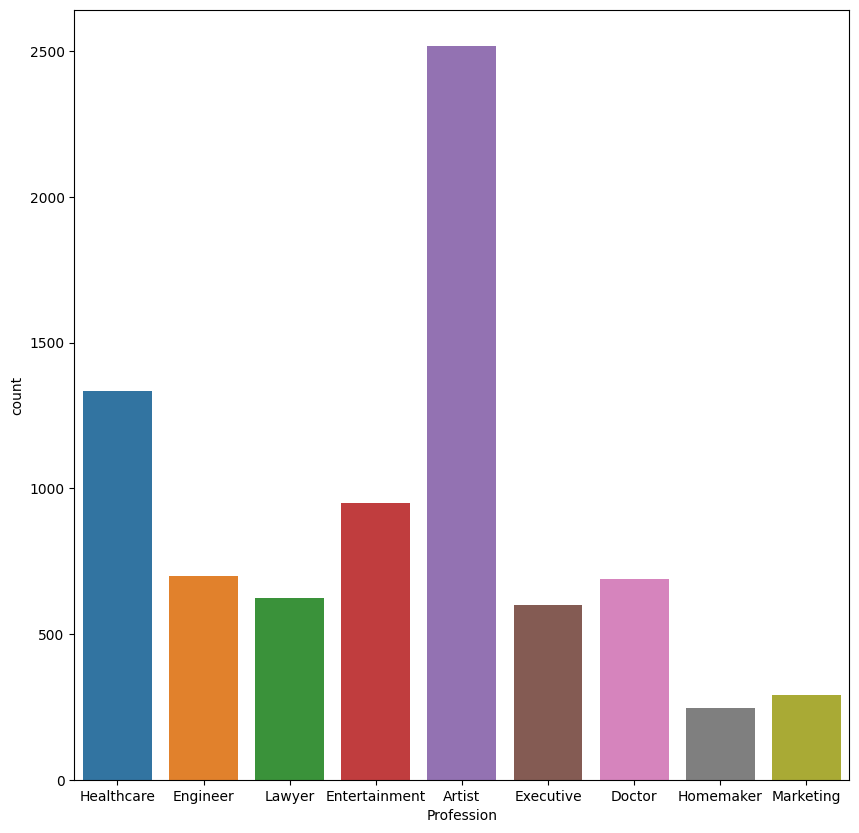

Work_Experience


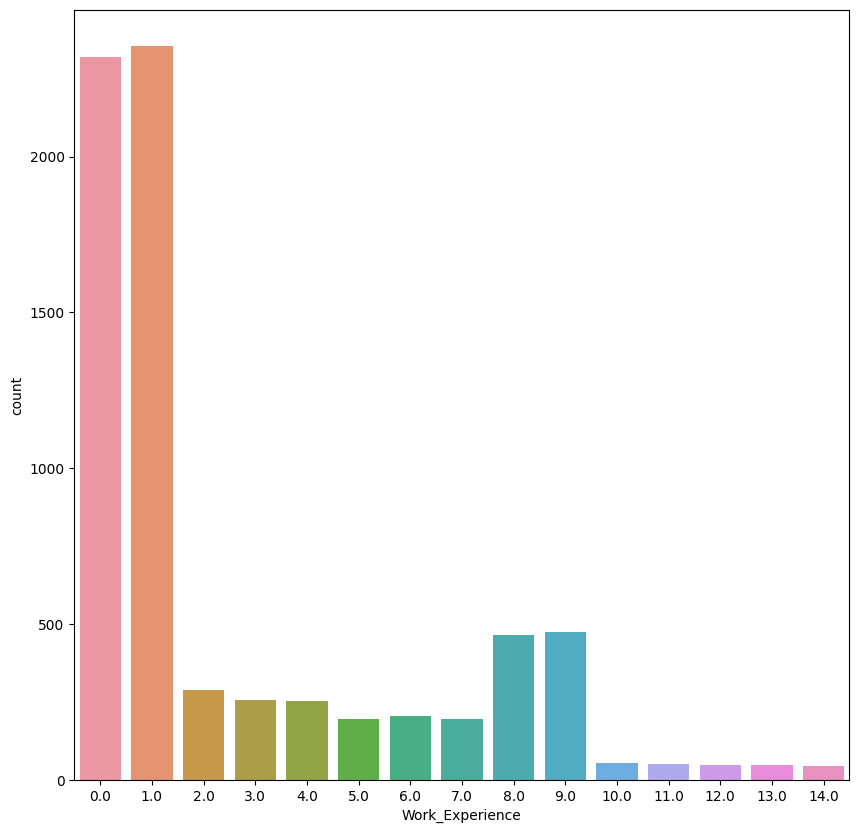

Spending_Score


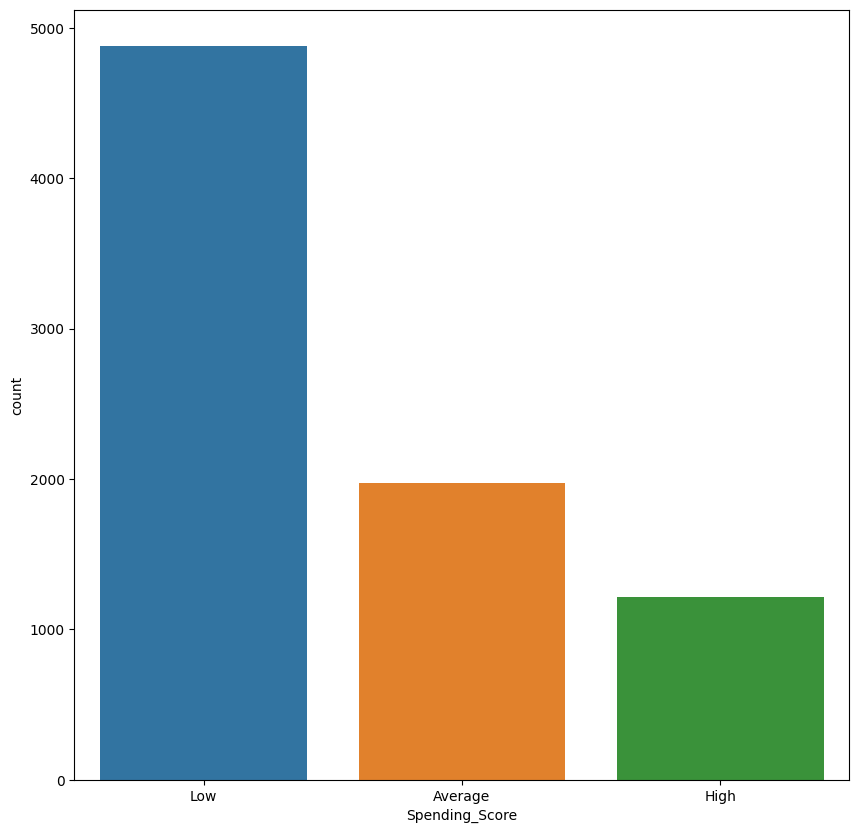

Family_Size


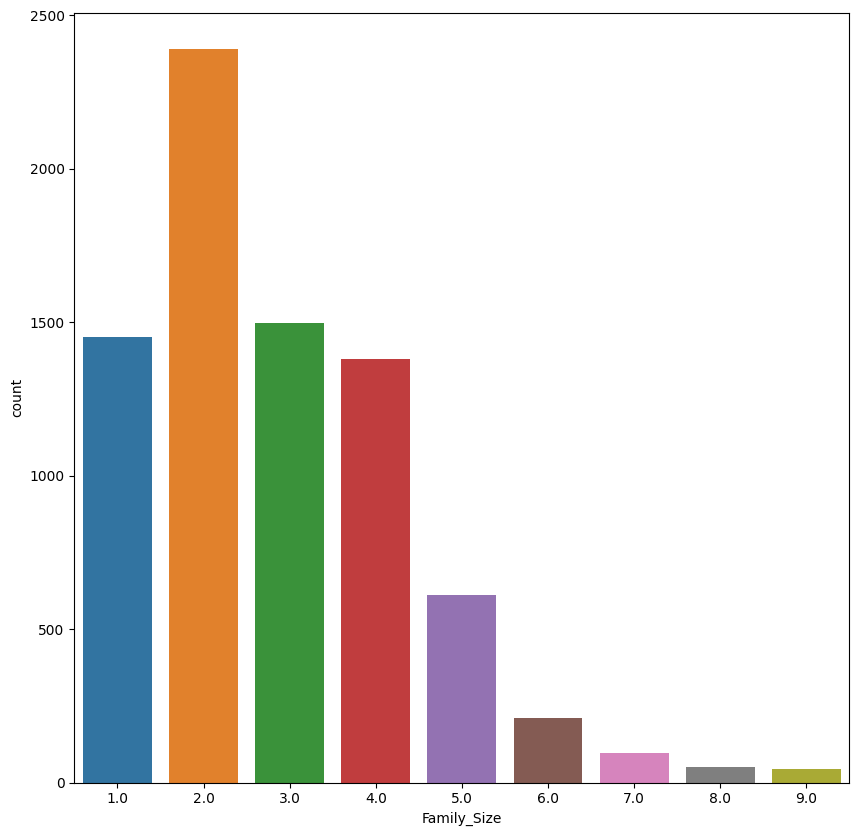

Var_1


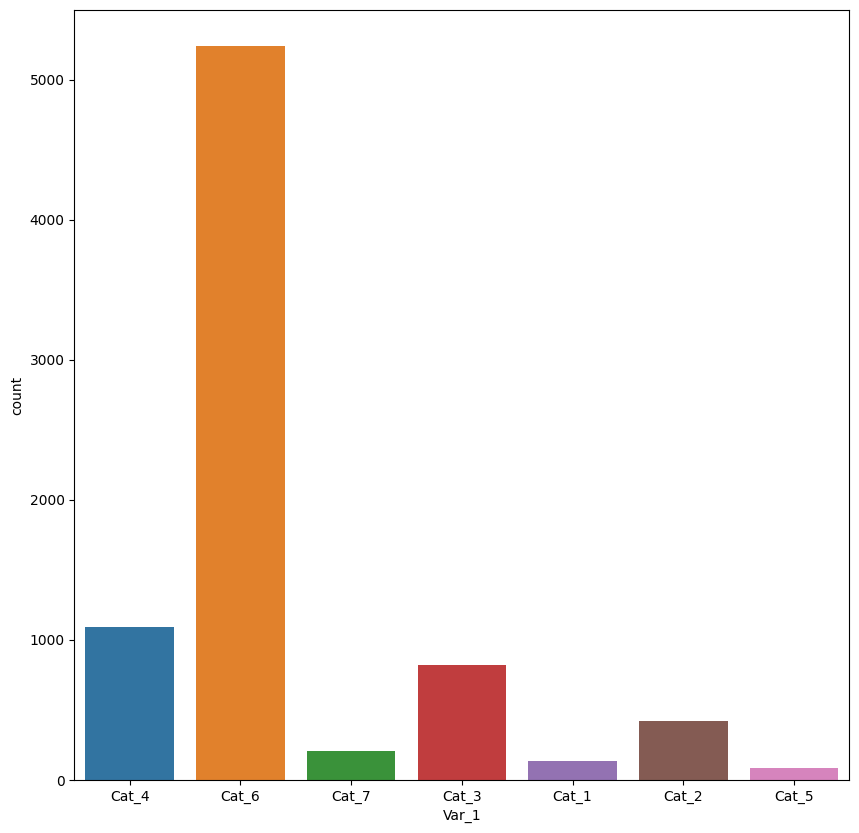

Segmentation


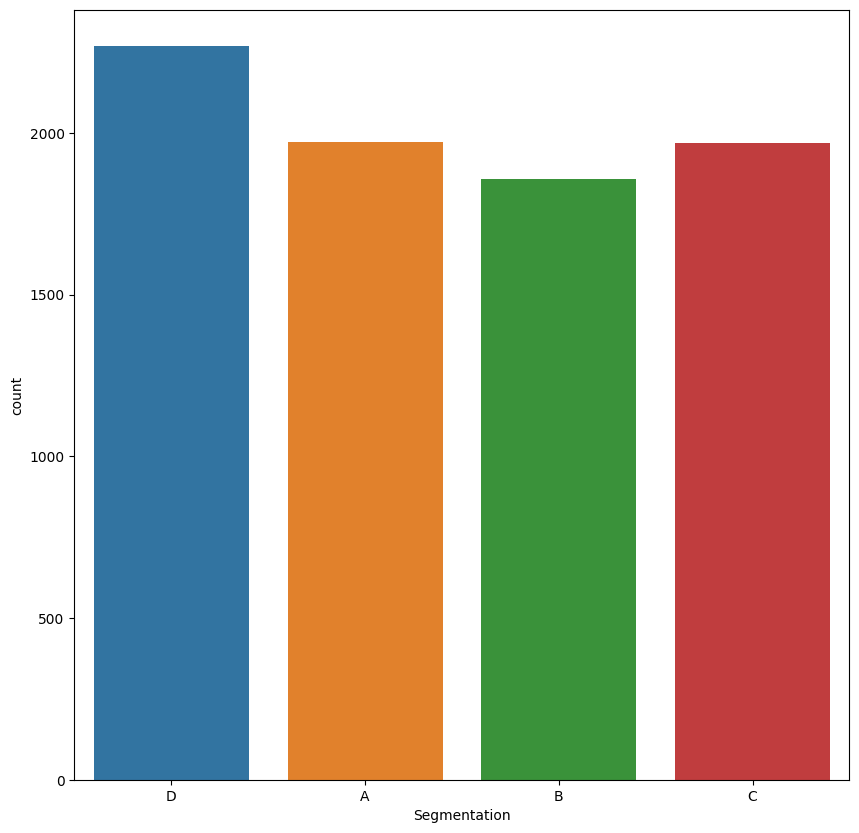

In [8]:
for cols in df.drop(['Age'],axis = 1).columns:
    print(cols)
    plt.figure(figsize = (10,10))
    sns.countplot(x=cols, data=df)
    plt.show()

In [9]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
cols1 = ['Ever_Married','Graduated','Profession','Work_Experience','Var_1']

for cols in cols1:
    df[cols] = imp.fit_transform(df[cols].values.reshape(-1,1))

In [10]:
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.NaN,strategy='mean')
cols2 = ['Work_Experience','Family_Size']

for cols in cols2:
    df[cols] = mean_imp.fit_transform(df[cols].values.reshape(-1,1))

<Axes: xlabel='Segmentation', ylabel='Age'>

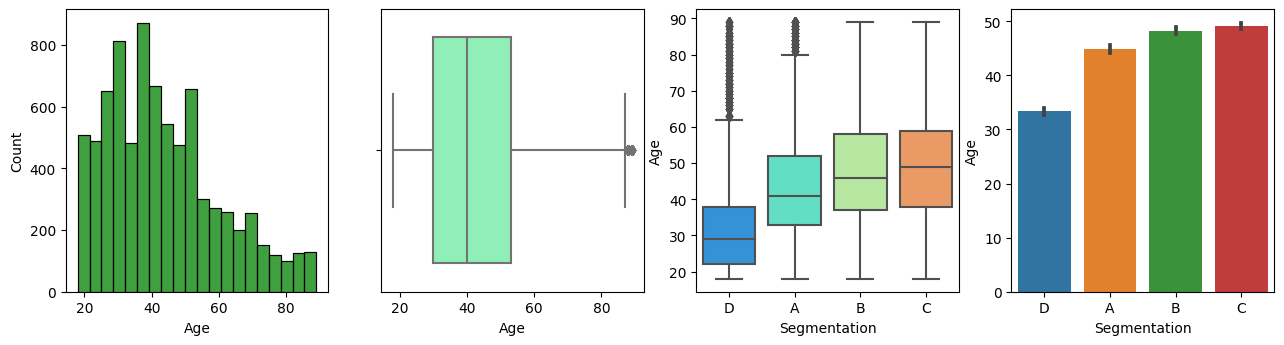

In [11]:
# Different sorts of plots to represent survival column with the age and fpp column
# I am representing them separately as they are continuous features
plt.figure(figsize = (40,40))
plt.subplots_adjust(hspace=0.1)
plt.subplot(10,10,1)
sns.histplot(df.Age,bins=20,color="Green",label = "Age")
plt.subplot(10,10,2)
sns.boxplot(x='Age',data=df,palette='rainbow')
plt.subplot(10,10,3)
sns.boxplot(x='Segmentation',y='Age',data=df,palette='rainbow')
plt.subplot(10,10,4)
sns.barplot(x='Segmentation',y='Age',data=df)

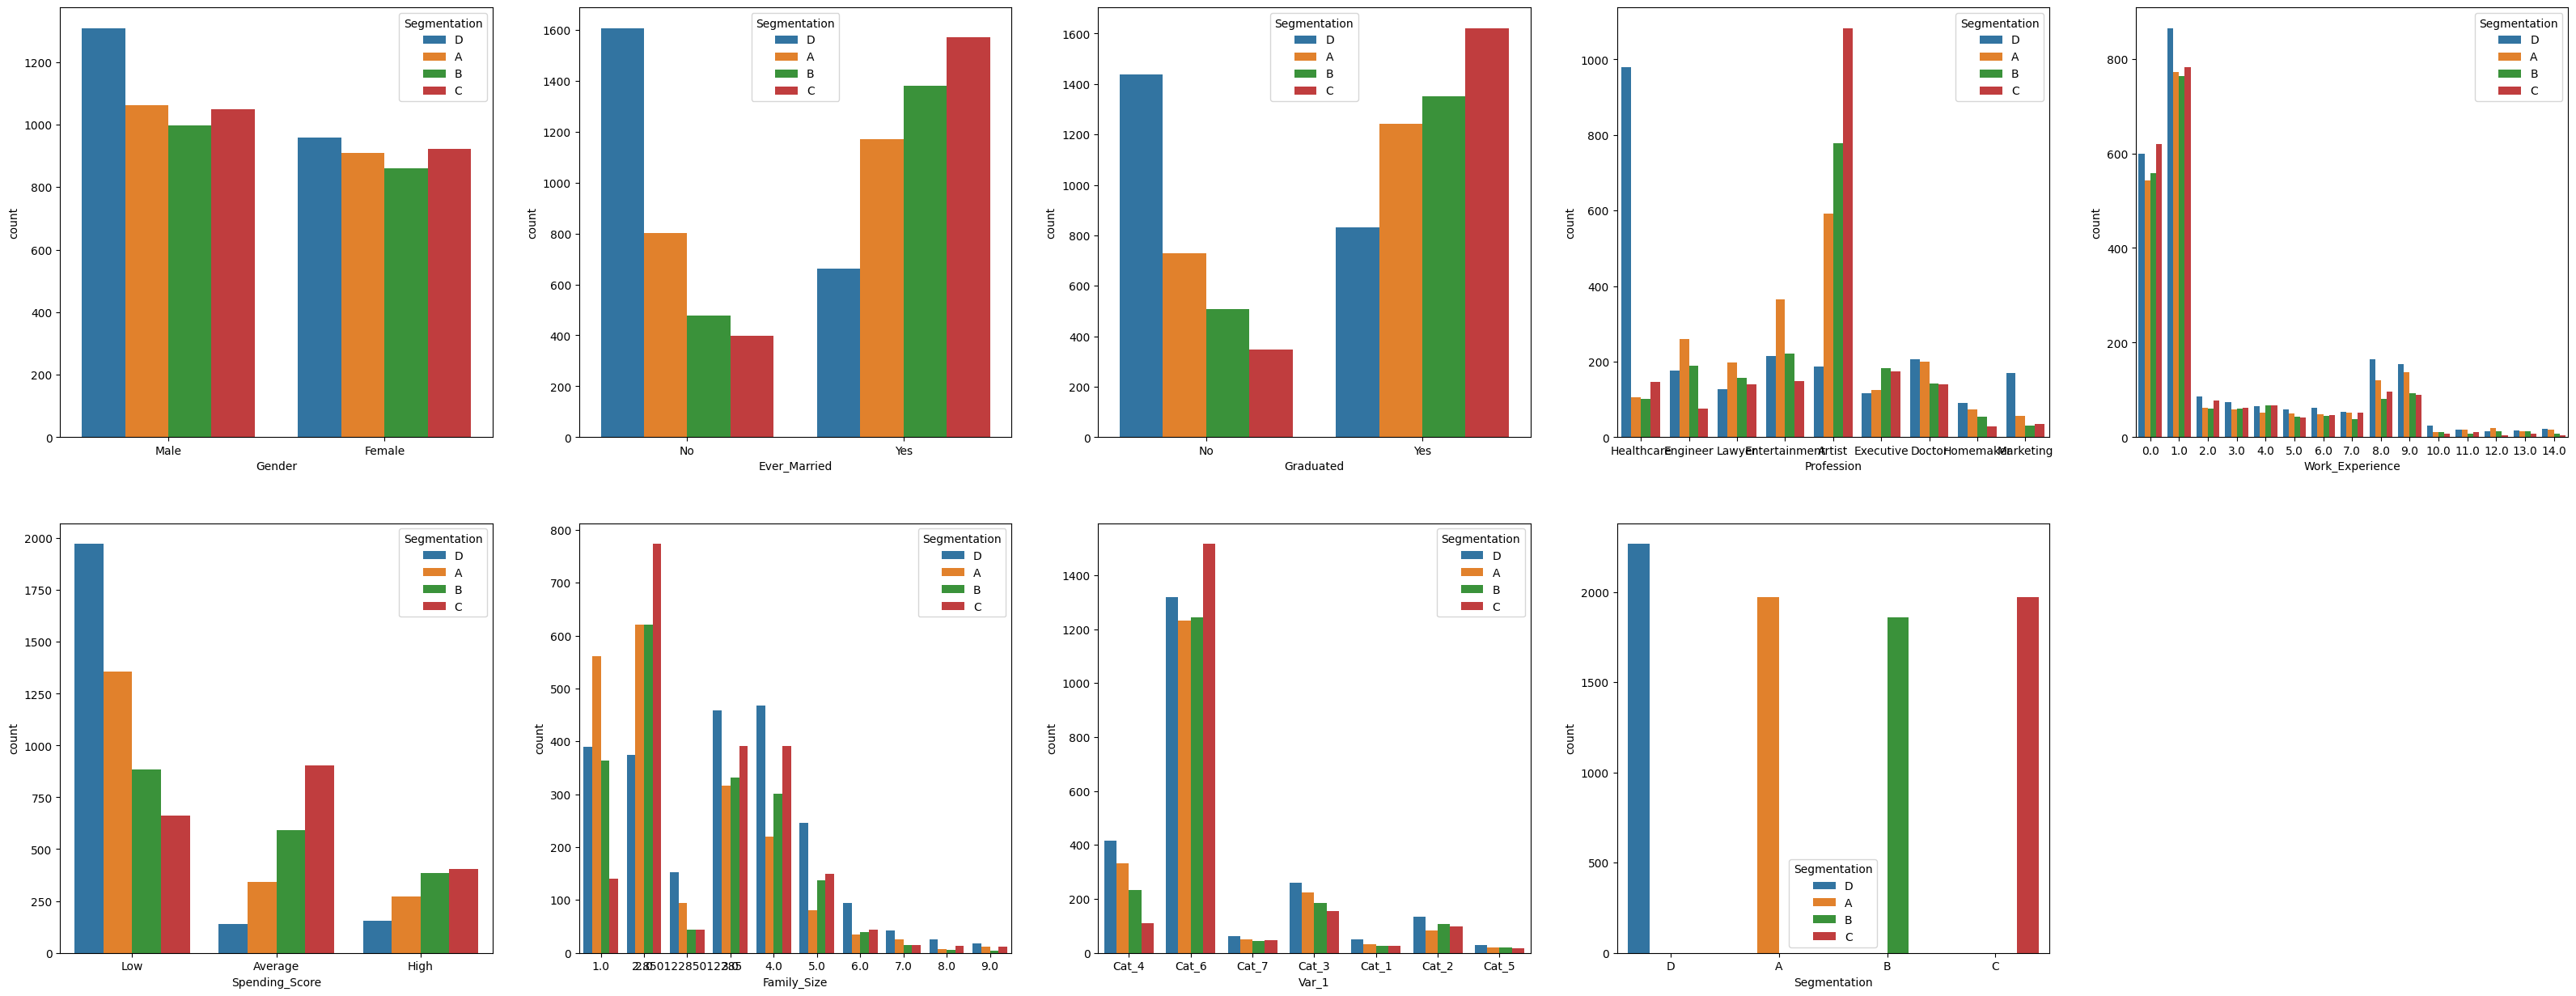

In [12]:
# Visualizing categrocial variables using countplots and crosstabs
plt.figure(figsize=(40,40))
i = 1
for cols in df.drop(['Age'],axis=1).columns:
    plt.subplot(5,5,i)
    sns.countplot(data = df,x = cols,hue = 'Segmentation')
    i = i+1

In [13]:
# One Hot encoding of remaining categorical features
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for cols in df.drop(['Age','Work_Experience','Family_Size'],axis = 1).columns:
    df[cols] = label.fit_transform(df[cols])

<Axes: >

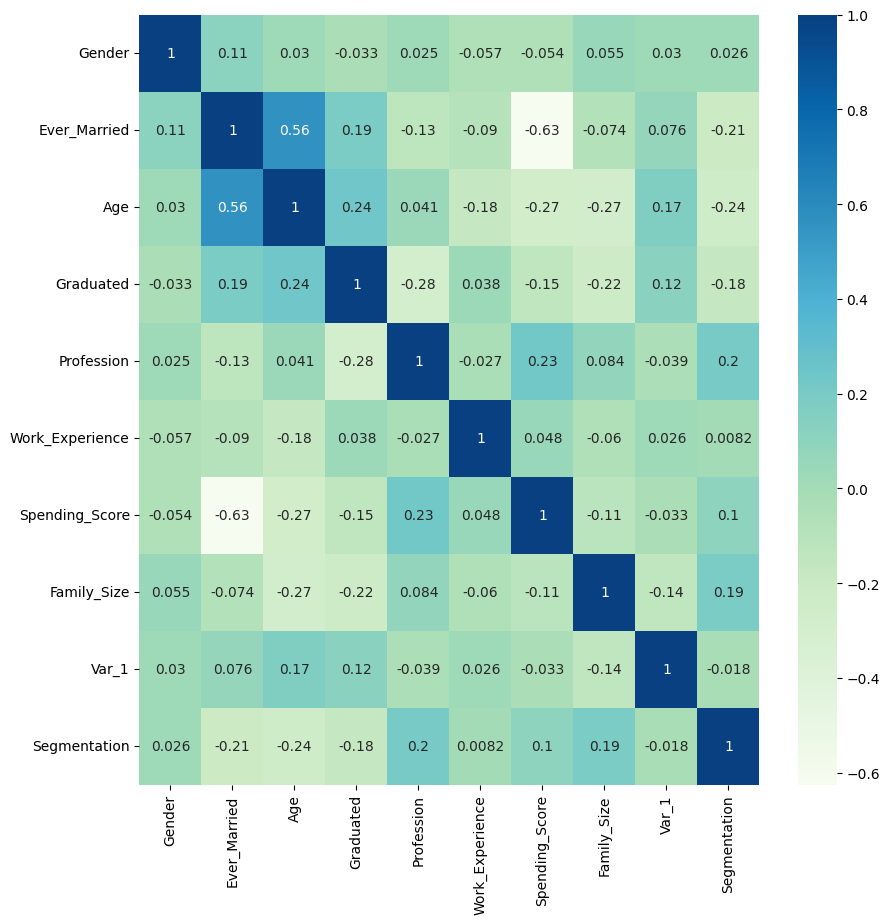

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap = "GnBu", annot = True)

In [15]:
# Normalizing our dataset
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
mod = df
s.fit(mod)
mod = pd.DataFrame(s.transform(mod))

In [16]:
# Splitting data in test and train set
X = mod.iloc[:,:]
y = df.iloc[:,-1]

In [17]:
print(X.shape)

(8068, 10)


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 'mle')
pca.fit(X)

PCA(n_components='mle')

In [19]:
print(pca.explained_variance_ratio_)

[0.30238957 0.19253679 0.15556715 0.09987515 0.07760435 0.04960808
 0.04165546 0.03973225 0.02411832]


In [20]:
X = pca.transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Different Ml models with their respective hyperparameters
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto',max_iter = 10000),
        'params': {
            'penalty' : ['l2'],
            'dual' : [False,True],
            'fit_intercept' : [False,True],
            'C': [1,5,10,20]
        }
    },
    'decision trees': {
        'model' : tree.DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy'],
            'splitter' : ['best','random'],
            'max_depth' : [10,20,30,40,50,None],
            'min_samples_leaf' : [1,2,3,4],
            'min_samples_split' : [2,3,4]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10,20],
            'kernel': ['rbf','linear','sigmoid'],
            'decision_function_shape' : ['ovo','ovr'],
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20],
            'criterion' : ['gini','entropy'],
            'max_depth' : [10,20,30,40,50,None],
            'min_samples_leaf' : [1,2,3,4],
            'min_samples_split' : [2,3,4],
            'bootstrap' : [False,True]
        }
    }
}

In [23]:
# This block of code will help us determine which model is best for our dataset
from sklearn.model_selection import GridSearchCV
scores = []
# Grid search cv
b = -1 # this will store the best accuracy and if the accuracy of a model exceeds the previous best then we will mark that model as the best model
for model_name, mp in model_params.items():
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    model = clf.fit(X_train, y_train)
    if(clf.best_score_>b):
        best_model = model
        name = model_name
        b = clf.best_score_
    print(clf.best_score_)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

logistic_regression
0.9267327596177
decision trees
0.9962814657239984
svm
1.0
random_forest
0.999586776859504


,model,best_score,best_params
0,logistic_regression,0.926733,"{'C': 5, 'dual': False, 'fit_intercept': True,..."
1,decision trees,0.996281,"{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
2,svm,1.000000,"{'C': 1, 'decision_function_shape': 'ovo', 'ke..."
3,random_forest,0.999587,"{'bootstrap': False, 'criterion': 'gini', 'max..."


In [24]:
y_predict = best_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

1.0

<Axes: >

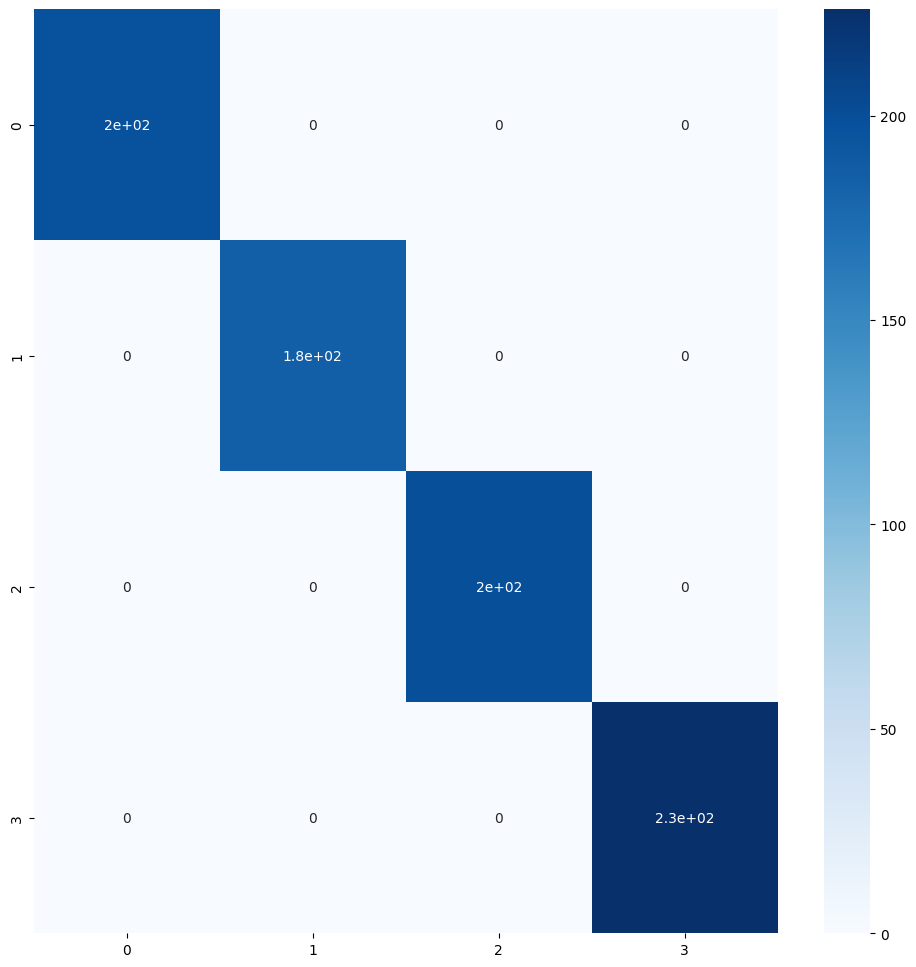

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predict, y_test)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, cmap='Blues')